# MOMENTUM TRADING STRATEGY

## stocks screening methodology
1.   filter 50 best performing stocks over past 12 months 
2.   filter 30 best performing stocks over past 6 months from above list
3.   filter 10 best performing stocks over past 3 months from above list


In [1]:
from Utils import Strategy
from Utils import Analytics
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start_date = '2019-01-01'
end_date = '2021-01-01'
portfolio_value = 1000000

In [3]:
st1 = Strategy(portfolio_value,'SP500', start_date, end_date)

[*********************100%%**********************]  503 of 503 completed


6 Failed downloads:
['VLTO', 'GEHC', 'KVUE', 'CEG']: Exception("%ticker%: Data doesn't exist for startDate = 1546318800, endDate = 1609477200")
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-01-01 -> 2021-01-01)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


In [4]:
st1.gen_returns('equal')

2019-12-31 00:00:00 2020-01-31 00:00:00
DatetimeIndex(['2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', name='Date', freq=None)
2020-01-31 00:00:00 2020-02-29 00:00:00
DatetimeIndex(['2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28'],
              dtype='datetime64[ns]', name='Date', freq=None)
2020-02-29 00:00:00 2020-03-31 00:00:00
E

,investment_value,portfolio_value,cash
Date,,,
2019-12-31,0,1000000,1000000
2020-01-02,1012727.17,1012929.81,202.64
2020-01-03,1002596.09,1002798.73,202.64
2020-01-06,1003702.19,1003904.83,202.64
2020-01-07,1017109.74,1017312.38,202.64
...,...,...,...
2020-12-28,1411483.97,1412418.78,934.81
2020-12-29,1393510.16,1394444.97,934.81
2020-12-30,1414645.46,1415580.27,934.81


In [ ]:
an1 = Analytics(st1)

,investment_value,portfolio_value,cash,returns,cumulative_returns,account_drawdown,drawdown_pct,uitilisation_ratio
Date,,,,,,,,
2019-12-31,0,1000000,1000000,NaN,NaN,0,0.0,0.0
2020-01-02,1012727.17,1012929.81,202.64,0.012930,1.012930,0.0,0.0,0.9998
2020-01-03,1002596.09,1002798.73,202.64,-0.010002,1.002799,10131.08,0.010002,0.999798
2020-01-06,1003702.19,1003904.83,202.64,0.001103,1.003905,9024.98,0.00891,0.999798
2020-01-07,1017109.74,1017312.38,202.64,0.013355,1.017312,0.0,0.0,0.999801
...,...,...,...,...,...,...,...,...
2020-12-28,1323633.72,1324422.79,789.07,-0.020687,1.324423,27976.84,0.020687,0.999404
2020-12-29,1306776.88,1307565.95,789.07,-0.012728,1.307566,44833.68,0.033151,0.999397
2020-12-30,1326592.17,1327381.24,789.07,0.015154,1.327381,25018.39,0.018499,0.999406


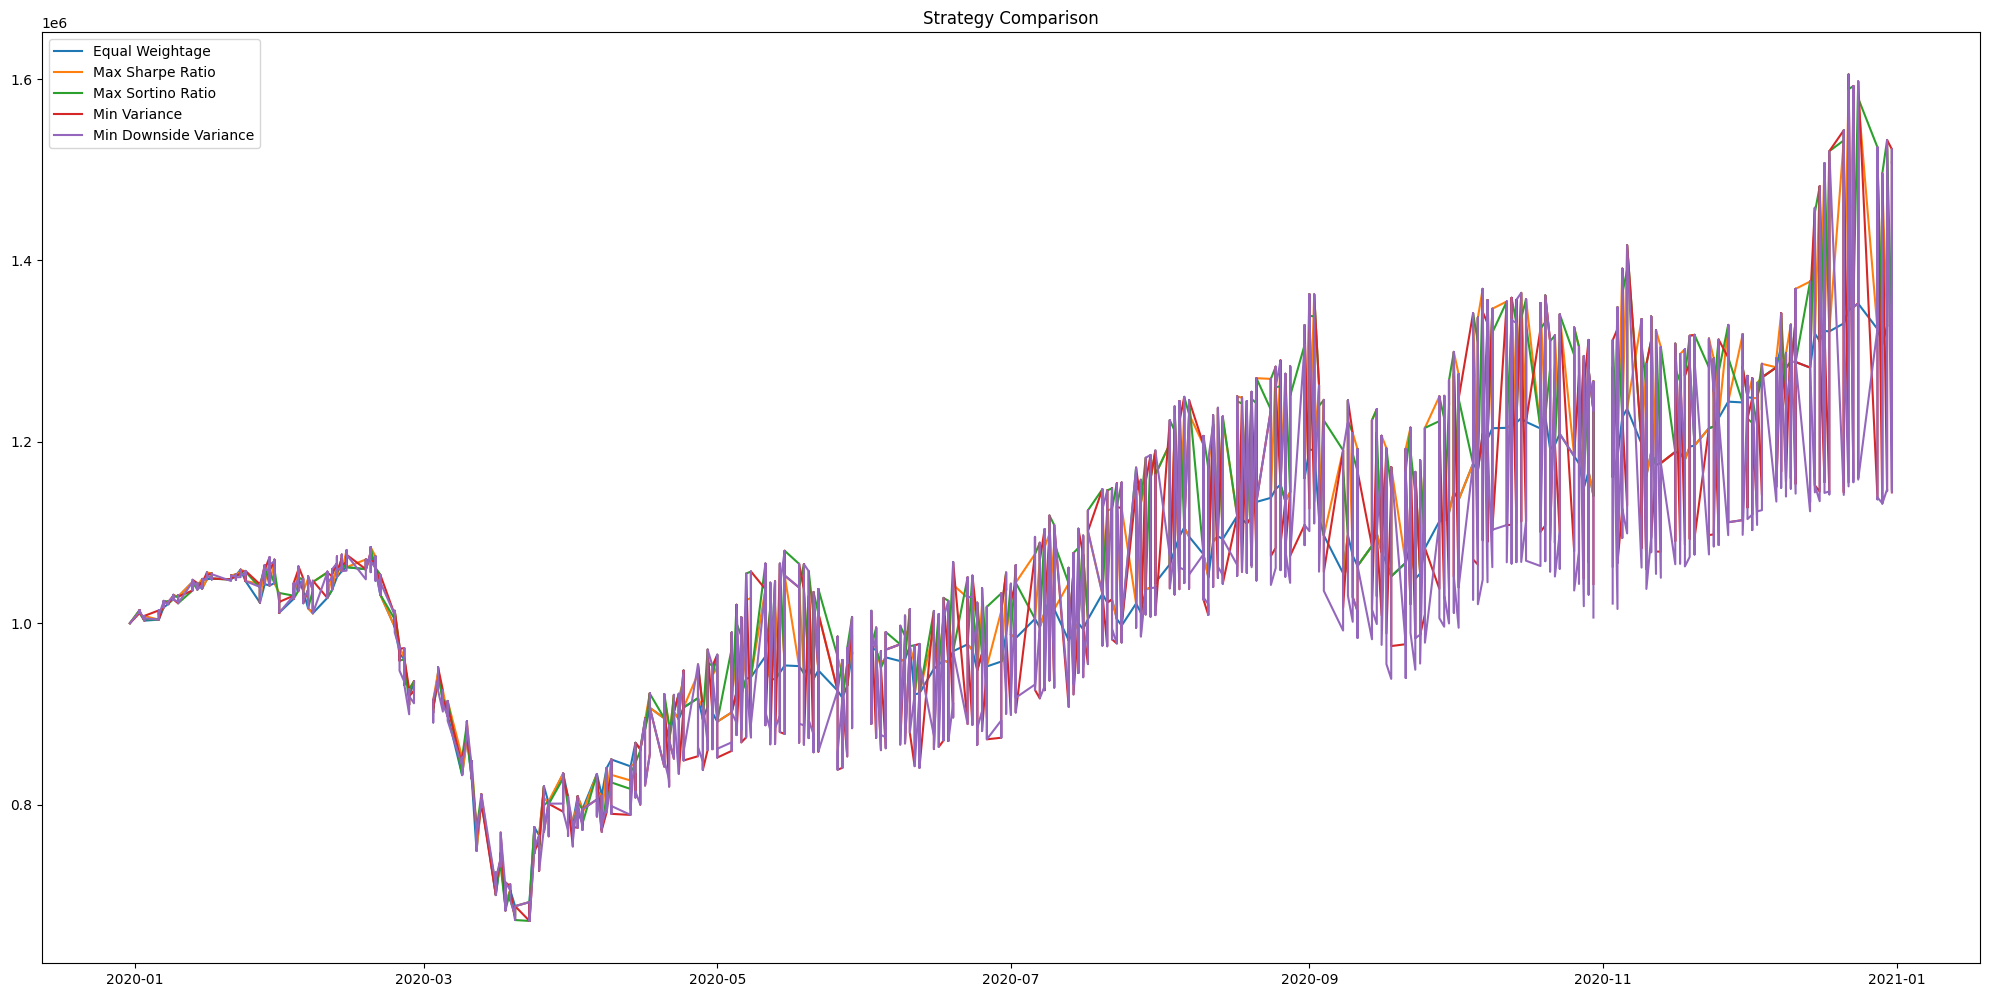

In [5]:
an1.plot_strategy_comparison()